# 1º División del conjunto de datos:
La división la he realizado con un 80% de los datos para train (8,929 registros) y un 20% para test (2,233 registros). Considero esta proporción adecuada para un dataset de este tamaño, ya que permite entrenar el modelo con una cantidad significativa de datos mientras se reserva un conjunto suficiente para evaluar su rendimiento.


In [16]:
# Lo primero que hago es importar pandas para trabajar con los datos y train_test_split de sklearn.model_selection para hacer la división de los datos.
import pandas as pd 
from sklearn.model_selection import train_test_split

# Creo un objeto que llamaré df donde con la función de pandas read.csv le indico la ruta del archivo.
df = pd.read_csv(r"C:\Users\javie\Downloads\bank_dataset.CSV")

# Efectúo la división de los datos que serán 80% para train y 20% para test.
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Para verificar esto hago un print de cada parte de la división.
print("Tamaño del conjunto de entrenamiento:", train_data.shape)
print("Tamaño del conjunto de prueba:", test_data.shape)


Tamaño del conjunto de entrenamiento: (8929, 17)
Tamaño del conjunto de prueba: (2233, 17)


# 2º Codificación de variables Categóricas:
He usado One-Hot Encoding para las variables categóricas, ya que no tienen un orden específico. Esta técnica convierte cada categoría en columnas con valores binarios, lo que facilita que los modelos de machine learning puedan utilizarlas.


In [26]:
# Importo OneHotEncoder de sklearn para codificar variables categóricas.
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Obtengo las columnas categóricas del DataFrame que son las type='object'.
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Creo el objeto de codificación OneHotEncoder, eliminando la primera categoría para cada variable.
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Codifico las columnas categóricas en los conjuntos de entrenamiento y prueba.
train_encoded_array = encoder.fit_transform(train_data[categorical_columns])
test_encoded_array = encoder.transform(test_data[categorical_columns])

# Convierto las matrices resultantes a DataFrames con los nombres de columna adecuados.
train_encoded_df = pd.DataFrame(train_encoded_array, columns=encoder.get_feature_names_out(categorical_columns))
test_encoded_df = pd.DataFrame(test_encoded_array, columns=encoder.get_feature_names_out(categorical_columns))

# Restablezco los índices para poder unirlos con los datos originales.
train_encoded_df.index = train_data.index
test_encoded_df.index = test_data.index

# Combino las columnas codificadas con el resto de las columnas en ambos conjuntos.
train_data_encoded = pd.concat([train_data.drop(columns=categorical_columns), train_encoded_df], axis=1)
test_data_encoded = pd.concat([test_data.drop(columns=categorical_columns), test_encoded_df], axis=1)

# Alineo las columnas en ambos conjuntos y relleno con ceros donde falten datos.
train_data_encoded, test_data_encoded = train_data_encoded.align(test_data_encoded, join='left', axis=1, fill_value=0)

# Configurar pandas para mostrar todas las columnas en el output
pd.set_option('display.max_columns', None)

# Imprime el total de columnas
print(f"Total de columnas después de la codificación: {train_data_encoded.shape[1]}")

# Verifico el resultado mostrando las primeras filas.
train_data_encoded.head()



Total de columnas después de la codificación: 45


,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_nan,education_secondary,education_tertiary,education_unknown,education_nan,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,deposit_yes
3955,28.0,5741,10,1042,5,200,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
11150,34.0,355,21,314,3,-1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5173,48.0,201,10,594,1,91,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3017,53.0,1961,15,351,1,-1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2910,53.0,1624,11,166,3,97,7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


En el resultado, las variables categóricas ahora están codificadas como 0.0 y 1.0, asignando 1.0 solo a la categoría correcta, como en el registro 3955, donde septiembre tiene 1.0 y el resto de los meses tienen 0.0. Esta codificación ayuda al modelo a interpretar correctamente las variables sin que una categoría influya más que otra. Inicialmente, pensé en asignar números aleatorios, pero después de estudiar la teoría y algunos tutoriales, entendí que esto podría confundir al modelo y afectar el rendimiento.

# 3º Estandarización de las Variables Numéricas:
He decidido utilizar StandardScaler para la estandarización de las variables numéricas. Este método transforma los datos para que tengan una media de 0 y una desviación estándar de 1, lo que es especialmente útil cuando las características tienen diferentes escalas y magnitudes. La estandarización es una práctica común en el preprocesamiento de datos, ya que puede mejorar el rendimiento de muchos algoritmos de machine learning.


In [27]:
# Importo StandarScaler de sklearn.preprocessing para realizar la estandarización de las variables.
from sklearn.preprocessing import StandardScaler

# Busco las columnas numéricas del df.
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Creo objeto escalador
scaler = StandardScaler()

# Aplicar la estandarización en el conjunto de train y test.
train_data_encoded[numeric_columns] = scaler.fit_transform(train_data_encoded[numeric_columns])
test_data_encoded[numeric_columns] = scaler.transform(test_data_encoded[numeric_columns])

# Visualizo los datos estandarizados.
train_data_encoded[numeric_columns].head()


,age,balance,day,duration,campaign,pdays,previous
3955,-1.114015,1.346271,-0.666669,1.941942,0.921804,1.374037,0.991722
11150,-0.609359,-0.371778,0.635888,-0.162532,0.182456,-0.476209,-0.367601
5173,0.568172,-0.420902,-0.666669,0.646881,-0.556892,0.370670,0.085506
3017,0.988719,0.140511,-0.074597,-0.055574,-0.556892,-0.476209,-0.367601
2910,0.988719,0.033013,-0.548255,-0.590364,0.182456,0.425901,2.804154


Explicación del Resultado: En Age tomando como referencia los registros: 3955, 11150 y 5173 teníamos :
Edad (original): 28, 34, 48
Edad (estandarizado): -1.11, -0.61, 0.57
Los valores numéricos se centran y normalizan, asegurando que cada variable tenga una influencia similar en el modelo, por lo que se puede ver que el registro 5173 es el que se acerca más a la media porque está más próximo a 0 mientras que el registro 3955 con -1.11 es el que más se aleja.
TENIENDO EN CUENTA QUE SOLO ESTAMOS TOMANDO ESTOS 3 REGISTROS PARA ESTA EXPLICACIÓN DE LOS RESULTADOS.

# 4º Reducción de la Dimensionalidad
* Primero hago la Matríz de Correlación para seleccionar los datos relevantes y así efectuar la reduccion de dimensionalidad

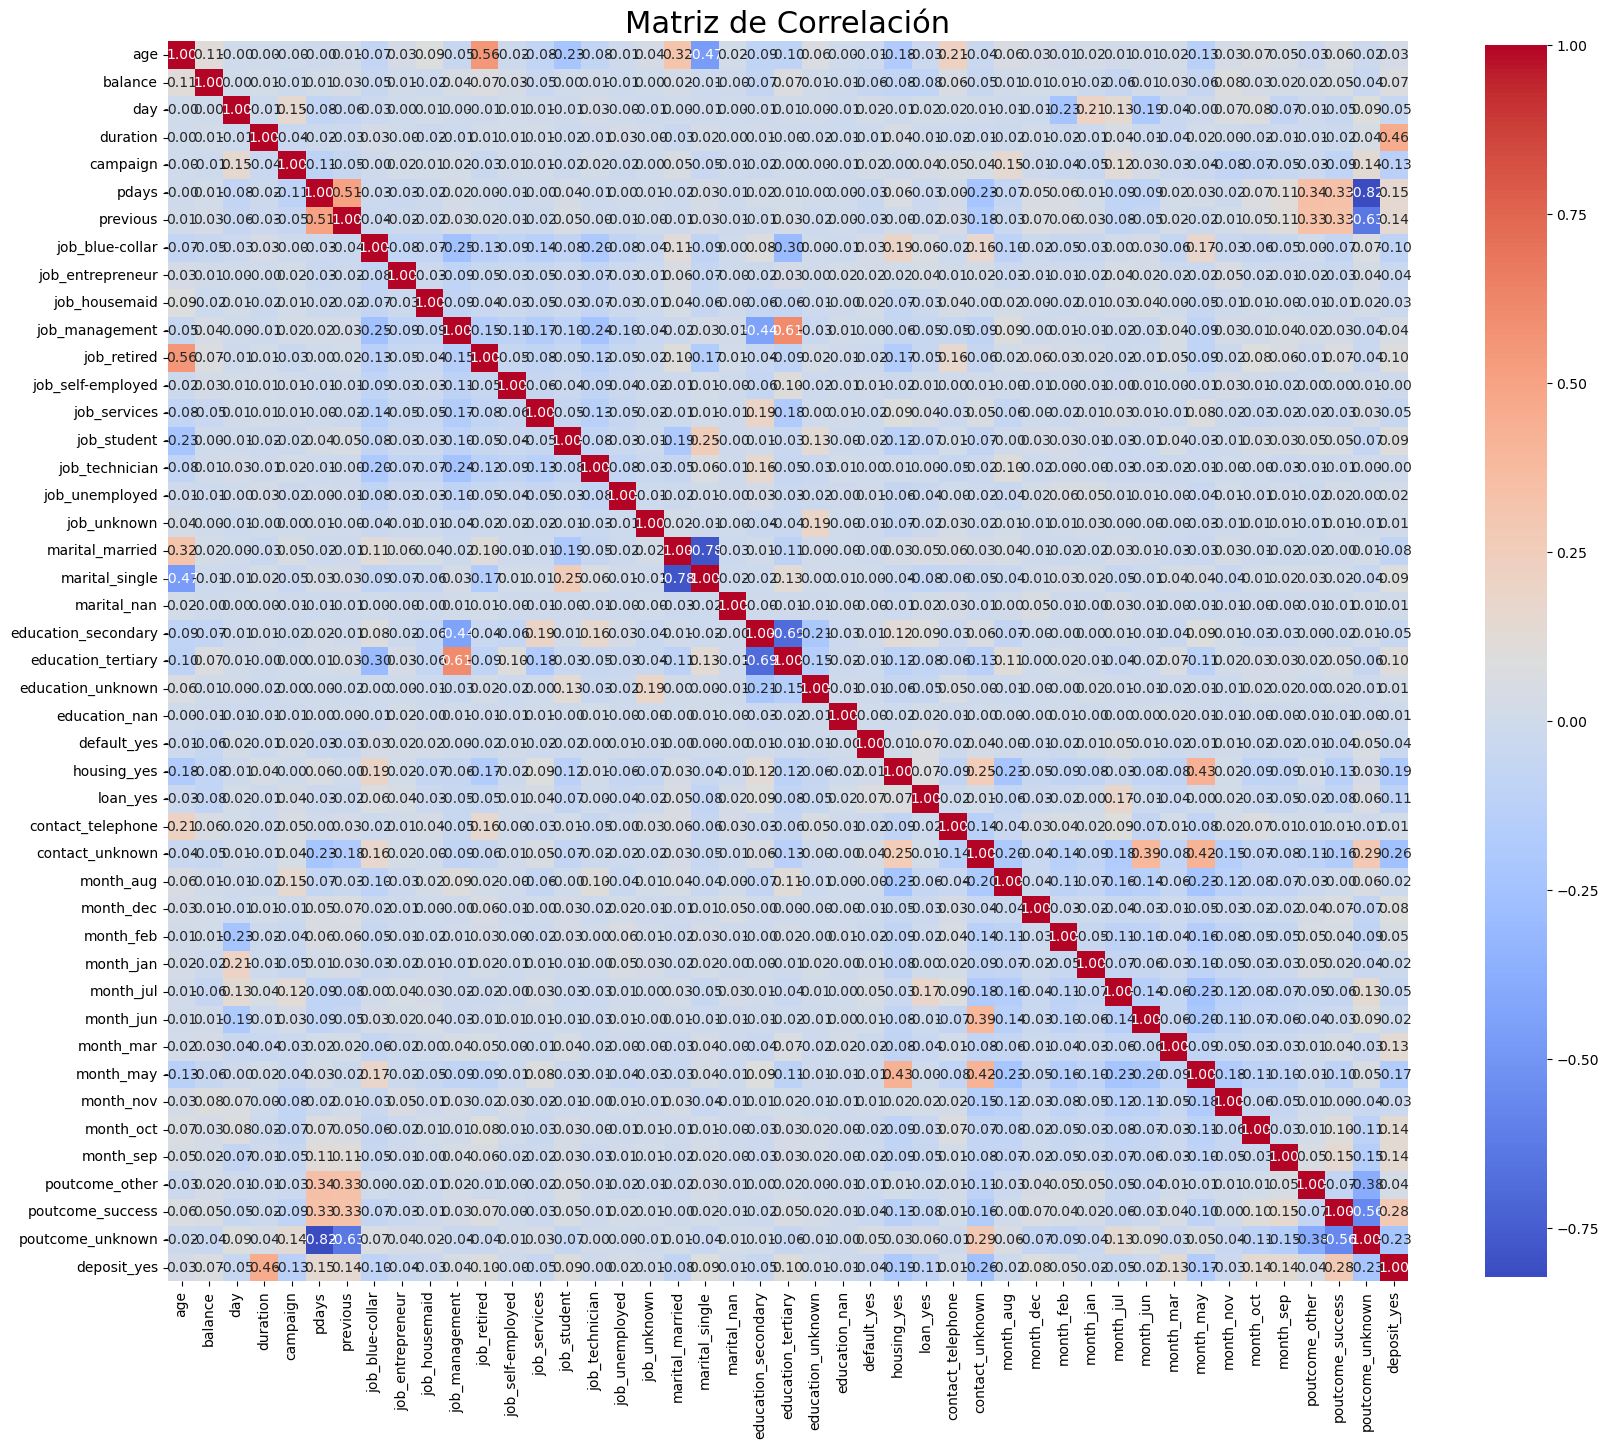

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el conjunto de datos en un objeto df
df = train_data_encoded

# Calcular la matriz de correlación
correlation_matrix = df[numerical_cols].corr()

# Configuro el tamaño de la figura
plt.figure(figsize=(20,20))

# Creo un mapa de calor (heatmap) de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

plt.title('Matriz de Correlación', fontsize=22)

plt.show()


* Una vez identificadas selecciono las columnas con las que trabajaré

In [70]:
# indico las columnas con las que voy a trabajar
columns_corr = ["pdays", "previous", "marital_married", "marital_single", "education_secondary", "education_tertiary", "poutcome_success", "poutcome_unknown"]

# Mostro el DataFrame
df_selected.head()


,pdays,previous,marital_married,marital_single,education_secondary,education_tertiary,poutcome_success,poutcome_unknown
3955,1.374037,0.991722,0.0,1.0,0.0,1.0,0.0,0.0
11150,-0.476209,-0.367601,1.0,0.0,1.0,0.0,0.0,1.0
5173,0.370670,0.085506,0.0,0.0,1.0,0.0,1.0,0.0
3017,-0.476209,-0.367601,1.0,0.0,0.0,1.0,0.0,1.0
2910,0.425901,2.804154,1.0,0.0,0.0,1.0,1.0,0.0


* Aplico el PCA

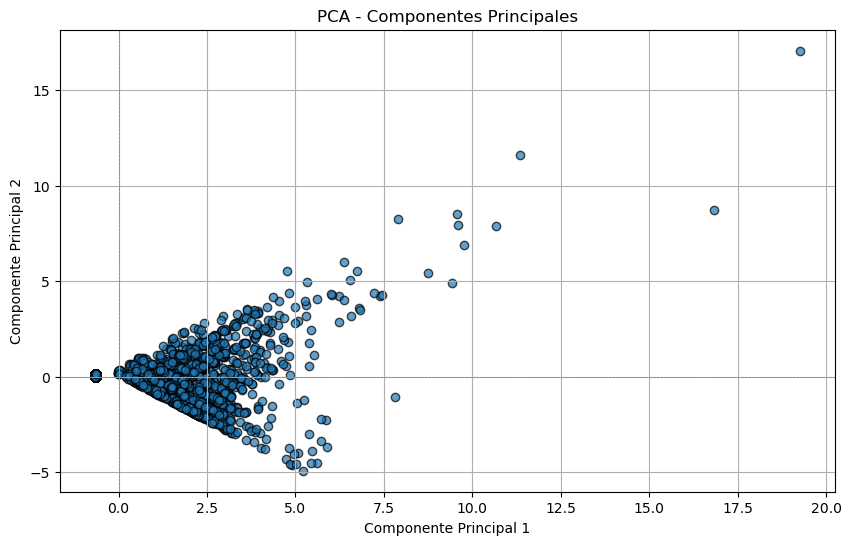

Varianza explicada por componente:
[0.51715629 0.1562971 ]


In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

columns_corr = ["pdays", "previous", "marital_married", "marital_single", 
                 "education_secondary", "education_tertiary", 
                 "poutcome_success", "poutcome_unknown"]

# Imprimir el DataFrame solo con las columnas de columns_corr
df_selected = df[columns_corr]

# Aplicar PCA
pca = PCA(n_components=2) 
X_pca = pca.fit_transform(df_selected)

# Convertir a DataFrame para facilidad de uso
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

# Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7, edgecolor='k')
plt.title('PCA - Componentes Principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid()
plt.axhline(0, color='gray', lw=0.5, ls='--')
plt.axvline(0, color='gray', lw=0.5, ls='--')
plt.show()

# Imprimir la varianza explicada por cada componente
print('Varianza explicada por componente:')
print(pca.explained_variance_ratio_)


* Efectúo la Proyección de los componentes principales

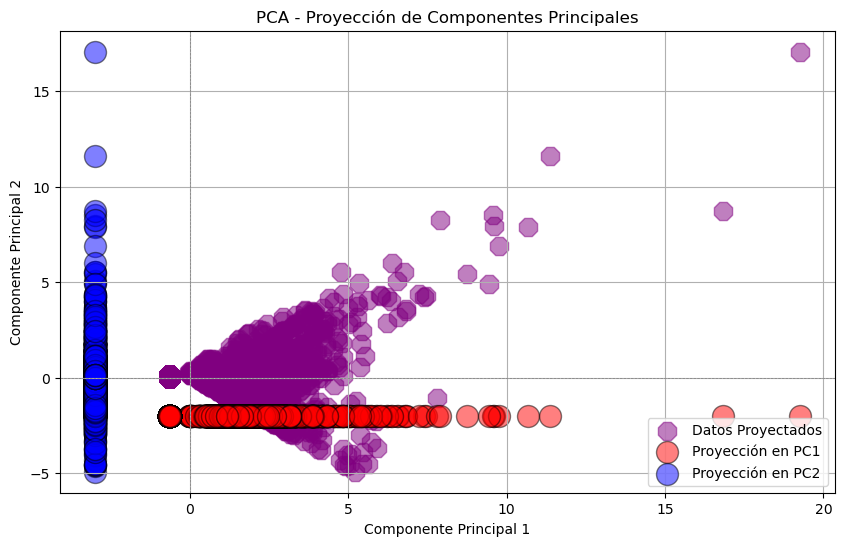

Varianza explicada por componente:
[0.51715629 0.1562971 ]


In [72]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

columns_corr = ["pdays", "previous", "marital_married", "marital_single", 
                 "education_secondary", "education_tertiary", 
                 "poutcome_success", "poutcome_unknown"]

# Aplicar PCA
pca = PCA(n_components=2)  
X_pca = pca.fit_transform(df_selected)

# Convertir a DataFrame para facilidad de uso
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

# Código de visualización 
plt.figure(figsize=(10, 6))
plt.axhline(0, color='gray', lw=0.5, ls='--')  # Línea horizontal en 0
plt.axvline(0, color='gray', lw=0.5, ls='--')  # Línea vertical en 0

# Datos rotados
plt.scatter(pca_df['PC1'], pca_df['PC2'], marker="8", s=200, color="purple", alpha=0.5, label='Datos Proyectados')

# Proyección de los datos en 1 dimensión (PC1)
plt.scatter(pca_df['PC1'], [-2]*len(pca_df['PC1']), s=250, color="red", alpha=0.5, edgecolor='k',  label='Proyección en PC1')

# Proyección de los datos en 1 dimensión (PC2)
plt.scatter([-3]*len(pca_df['PC2']), pca_df['PC2'], s=250, color="blue", alpha=0.5, edgecolor='k', label='Proyección en PC2')

plt.title('PCA - Proyección de Componentes Principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid()
plt.show()

# Imprimir la varianza explicada por cada componente
print('Varianza explicada por componente:')
print(pca.explained_variance_ratio_)


* Hago la visualización de los componentes principales.

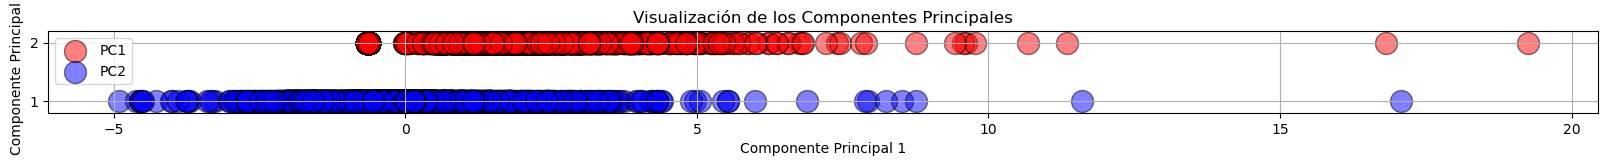

Varianza explicada por cada componente: [1.65902448 0.50139719]
Proporción de varianza explicada por cada componente: [0.51715629 0.1562971 ]


In [73]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

columns_corr = ["pdays", "previous", "marital_married", "marital_single", 
                 "education_secondary", "education_tertiary", 
                 "poutcome_success", "poutcome_unknown"]

# Código de visualización
plt.figure(figsize=(20, 20))
plt.axes().set_aspect("equal")

# Graficar los dos primeros componentes principales
plt.scatter(datos[:, 0], [2]*datos[:, 0].size, s=250, color="red", alpha=0.5, label='PC1',edgecolor='k')
plt.scatter(datos[:, 1], [1]*datos[:, 1].size, s=250, color="blue", alpha=0.5, label='PC2',edgecolor='k')

plt.ylim((0.8, 2.2))
plt.title('Visualización de los Componentes Principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid()
plt.show()

# Imprimir la varianza explicada
print("Varianza explicada por cada componente:", pca.explained_variance_)
print("Proporción de varianza explicada por cada componente:", pca.explained_variance_ratio_)
